# Introduction to Data Science - Homework 3
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: Friday, February 12, 11:59pm.

In this homework you will read in and analyze a movies dataset. First we'll do some basic analysis with vanilla Python, then we'll move on to doing more advanced analysis with [Pandas](http://pandas.pydata.org/pandas-docs/stable). 


## Your Data
Fill out the following information: 

* First Name:Andreas 
* Last Name:Martinson
* E-mail:andreas.martinson@utah.edu
* UID:u1291396


In [1]:
# imports
import csv
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Part 1: Analyzing Data The Hard Way

In this part we'll do some manual analysis of a movies dataset.

### Task 1.1: Read in the data

Parse the file [movies.csv](movies.csv) using the [csv library](https://docs.python.org/3/library/csv.html). Lecture 6 and might be a good inspiration for this. 

We recommend that you store the header in a separate array. Make sure that at least the "ratings" and the "votes" columns are cast to the appropriate data types for doing calculations with them. 

Print the header, a row of the table, and the number of rows and columns.

In [2]:
# initialize the top-level array
movies = []
header = []

import csv

with open('movies.csv') as file:
    filereader = csv.reader(file, delimiter=',',quotechar='"')
    count = 0
    for row in filereader:
        if count == 0:
            header = row
            rating_index = header.index('rating')
            votes_index = header.index('votes')
        else:
            row[5] = float(row[rating_index]) # convert rating to float
            row[6] = int(row[votes_index])   # convert votes to int
            movies.append(row)
        count +=1

print(header)
print(movies[0])
print(len(movies), len(header))

['', 'title', 'year', 'length', 'budget', 'rating', 'votes', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 'mpaa', 'Action', 'Animation', 'Comedy', 'Drama', 'Documentary', 'Romance', 'Short']
['1', '$', '1971', '121', 'NA', 6.4, 348, '4.5', '4.5', '4.5', '4.5', '14.5', '24.5', '24.5', '14.5', '4.5', '4.5', '', '0', '0', '1', '1', '0', '0', '0']
58788 25


### Task 1.2:  Calculate movie stats

In this task, you will calculate some statistics about movies. We suggest you implement your solutions for Tasks 1.2.1-1.2.3 in one code cell – you should be able to calculate this in a single iteration over the dataset.

#### Task 1.2.1 Calcualte average ratings
Compute the average rating for the movies and print the output. Also print the number of movies.
Your output could look like this:
    
    Average rating: xxx.xxxx, Number of movies: xx

#### Task 1.2.2: Calculate average rating for major movies

Compute the average rating for the movies that have more than 400 votes in your loaded dataset and print the output. (We'll call these movies with more than 400 votes *major movies* from now on).

Your output could look like this:
    
    Average rating of movies with more than 400 votes: xxx.xxxx, Number of major movies: xx

#### Task 1.2.3: Find the highest rated major movie

Find out which of the movies with more than 400 votes has the highest rating.

Your output could look like this:
    
    Highest rating: xxx.xxxx, Title: MOVIE TITLE
 
#### Task 1.2.4: Interpret the data
 * What's the size relationship of major movies to all movies?
 * Are major movies usually better than the average movies?

In [3]:
# Task 1.2.1
print('Task 1.2.1\n')

avg_rating = []
for i in movies:
    avg_rating.append(i[rating_index])
avg_rating_num = sum(avg_rating)/len(avg_rating)
print('Average rating: {:.4f}, Number of movies: {}'.format(avg_rating_num, len(movies)))

# Task 1.2.2
print('\nTask 1.2.2\n')

avg_rating400 = []
title_rating400 = []
for i in movies:
    if i[votes_index] > 400:
        avg_rating400.append(i[rating_index])
        avg_rating400_dict = {i[rating_index]: i[header.index('title')]}

avg_rating400num = sum(avg_rating400)/len(avg_rating400)

print('Average rating of movies with more than 400 votes: {:.4f}, Number of major movies: {}'\
      .format(avg_rating400num, len(avg_rating400)))

# Task 1.2.3
print('\nTask 1.2.3\n')

avg_rating400_max = 0
title_rating400_max = ''
for i in movies:
    if i[votes_index] > 400 and i[rating_index] >= avg_rating400_max:
        avg_rating400_max = i[rating_index]
        title_rating400_max = i[header.index('title')]
        

print('Highest rating: {:.4f}, Title: {}'.format(avg_rating400_max,title_rating400_max))

Task 1.2.1

Average rating: 5.9329, Number of movies: 58788

Task 1.2.2

Average rating of movies with more than 400 votes: 6.3456, Number of major movies: 7299

Task 1.2.3

Highest rating: 9.1000, Title: Shawshank Redemption, The


**Your Interpretation**: 

* What's the size relationship of major movies to all movies?

There are roughly 10 movies for every major movie.

* Are major movies usually better than the average movies?

According to the rating, the major movies are more highly rated, so I guess I would have to say yes

## Part 2: Pandas

In this part we will use the [Pandas library](http://pandas.pydata.org/pandas-docs/stable) for our analysis.

### Task 2.1: Loading data

Read in the data again. This time you should create a [Pandas DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html). Print the head of the dataset. 
 * How many data rows did you load? How many columns?
 * Of which data types are the columns? 
 * Do you have to do manual data type conversions?

In [4]:
import pandas as pd

movies_df = pd.read_csv('movies.csv', index_col = 0)
print(movies_df.head())

print('Q1: How many data rows did you load? How many columns?')
print('There are {} rows and {} columns\n'.format(movies_df.shape[0], movies_df.shape[1]))
print('Q2: Of which data types are the columns?')
print('Here are the column data types:\n')
movies_df.info()
print('\nDo you have to do manual data type conversions?')
print('It doesn\'t look like it')

                      title  year  length  budget  rating  votes    r1    r2  \
1                         $  1971     121     NaN     6.4    348   4.5   4.5   
2         $1000 a Touchdown  1939      71     NaN     6.0     20   0.0  14.5   
3    $21 a Day Once a Month  1941       7     NaN     8.2      5   0.0   0.0   
4                   $40,000  1996      70     NaN     8.2      6  14.5   0.0   
5  $50,000 Climax Show, The  1975      71     NaN     3.4     17  24.5   4.5   

    r3    r4  ...    r9   r10  mpaa  Action  Animation  Comedy Drama  \
1  4.5   4.5  ...   4.5   4.5   NaN       0          0       1     1   
2  4.5  24.5  ...   4.5  14.5   NaN       0          0       1     0   
3  0.0   0.0  ...  24.5  24.5   NaN       0          1       0     0   
4  0.0   0.0  ...  34.5  45.5   NaN       0          0       1     0   
5  0.0  14.5  ...   0.0  24.5   NaN       0          0       0     0   

   Documentary  Romance  Short  
1            0        0      0  
2            0      

**Your Interpretation**: I included my interpretations as print statements in the code section

### Task 2.2: Calculate the average rating

Compute the average rating for all movies and print the output in a formatted way.

Your output could look like this:
    
    Average rating: xxx.xxxx

In [5]:
print('Average rating: {:.4f}'.format(movies_df.loc[:,'rating'].mean()))

Average rating: 5.9329


### Task 2.3: Compare the runtime

We want to measure the runtime of the mean calculation using [Pandas](http://pandas.pydata.org/pandas-docs/stable) and compare it to the computation time for calculating the mean using a for loop (you can copy the relevant parts from Task 1). However, since this dataset still not very large, run the mean calculations 200 times in a loop and measure that. 

You can use [time.process_time()](https://docs.python.org/3/library/time.html#time.process_time) to set timestamps before and after the execution of the code you want to measure, then you simply subtract end time from start time.

Print your results in a human readable way and add a metric to the output. Calculate the factor of the difference and print it. Note that the exact times and the factors will vary when you re-run this and especially between machines. 

E.g.:  
    time using own code: xxx.xxx s  
    time using Pandas: xxx.xxx s  
    difference factor: xxx
    
Interpret the results. Is this difference substantial?     

In [6]:
import time

beg_time_manual = time.process_time()

for x in range(20):
    avg_rating = []
    for i in movies:
        avg_rating.append(i[rating_index])
        avg_rating_num = sum(avg_rating)/len(avg_rating)

end_time_manual = time.process_time()

beg_time_pandas = time.process_time()

for x in range(20):
    movies_df.loc[:,'rating'].mean()
    
end_time_pandas = time.process_time()

manual_diff = end_time_manual-beg_time_manual
pandas_diff = end_time_pandas-beg_time_pandas
diff_factor = manual_diff/pandas_diff

print('time using own code: {}\n'.format(manual_diff))
print('time using Pandas: {}\n'.format(pandas_diff))
print('difference factor: {}\n'.format(diff_factor))

time using own code: 238.75

time using Pandas: 0.015625

difference factor: 15280.0



**Your Interpretation**: I only ran this with 20 loops since it took too long using 200. When looking at this just using 20 loops for each process, I would say the difference is substantial with a factor of 15,280. It is 15,280 times faster to us pandas than to use the manual process

### Task 2.4: Filter out Rows

The whole movies dataset has about 60k entries. Use pandas to filter your dataframe to contain only the major movies with more than 400 votes.

Count and print the number of movies with more than 400 votes. 

E.g.:
    xxx.xxx movies have more than 400 votes.

In [144]:
movies_df400 = movies_df[movies_df['votes']>400]
print('{} movies have more than 400 votes.'.format(movies_df400.shape[0])) 

7299 movies have more than 400 votes.


### Task 2.5: Calculate the average rating for major movies

Compute the average rating for the major movies.
Your output could look like this:
    
    Average rating of major movies: xxx.xxxx

In [146]:
print('Average rating of major movies: {:.4f}'.format(movies_df400.loc[:,'rating'].mean()))

Average rating of major movies: 6.3456


### Task 2.6: Find the highest rated major movie

Find the highest rated major movie in the dataframe. Hint: [idxmax()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.idxmax.html) could be a helpful function, or you could sort by rating and retrieve the first element. 

Print the title and the rating.

Your output could look like this:
    
    Highest rated movie: TITLE, rating: x.x


In [167]:
highest_rated_movie = movies_df.sort_values('rating', ascending=False).iloc[0][['title','rating']]

print('Highest rated movie: {}, rating: {}'.format(highest_rated_movie['title'],highest_rated_movie['rating'] ))

title     Shawshank Redemption, The
rating                          9.1
Name: 46269, dtype: object

### Task 2.7: Filter out rows and count specific features

From the major movies you filtered out in a previous task, find out 
 * How many are comedies.
 * How many are dramas
 * How many are both, comedies and dramas
 
Create new dataframed for each of these subsets.

Hint: you can combine broadcasting statements with a boolean AND by using the `&` operator.

Print the results, e.g.:  

    xxx.xxx major movies are comedies.
    xxx.xxx major movies are dramas.
    xxx.xxx major movies are both, comedies and dramas.

In [185]:
print('{} major movies are comedies'.format(movies_df400['Comedy'].sum()))
print('{} major movies are dramas'.format(movies_df400['Drama'].sum()))
print('{} major movies are both, comedies and dramas'.format(\
                movies_df400[(movies_df400['Drama'] == 1)&(movies_df400['Comedy'] == 1)].shape[0]\
                                                            ))

2853 major movies are comedies
3771 major movies are dramas
894 major movies are both, comedies and dramas


### Task 2.8: Compare ratings of different categories

Now we want to compare the ratings for comedies and dramas for major movies.

Compute the average rating, maximum rating, minimum rating, standard deviation, and the median for each category. Hint: there is a function that does all of this in one line. 

What do these numbers tell us? Provide an interpretation.

In [196]:
print(movies_df400[movies_df400['Comedy']==1].groupby(['Comedy'])['rating'].describe())
print(movies_df400[movies_df400['Drama']==1].groupby(['Drama'])['rating'].describe())


         count      mean       std  min  25%  50%  75%  max
Comedy                                                     
1       2853.0  6.117525  1.191856  1.7  5.3  6.2  7.0  8.9
        count      mean       std  min  25%  50%  75%  max
Drama                                                     
1      3771.0  6.732432  0.990911  1.3  6.1  6.9  7.4  9.1


**Your Interpretation**: 

Drama has a higher average rating and higher median, which means that the majority of people rate dramas higher than comedies. 
Comedy has a larger standard deviation, possibly indicating that there are larger differences in opinions of the movies for comedy than for drama.

### Task 2.9: Movies per year

Calcluate how many major movies in this dataset were made in each year.

Print the number like this, sorted by year:

    year   number of movies
    1902    xxx
    1903    xxx
    ...     ...

Use this data to render a line chart of the number of movies per year.

In [256]:
# your code goes here
# movies_df.groupby(['year'], as_index=False).count()
movies_df['number of movies']=1
movies_yr = movies_df.groupby('year', as_index=False).sum().loc[:,['year','number of movies']]



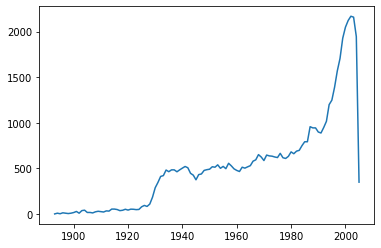

In [257]:
import matplotlib.pyplot as plt

plt.plot(movies_yr['year'], movies_yr['number of movies'])

### Task 2.10: Yearly average

Compute the average rating per year for all major movies.  
Use the numbers you computed to plot a line chart. Plot the year on the x-axis and the average rating on th y axis.  

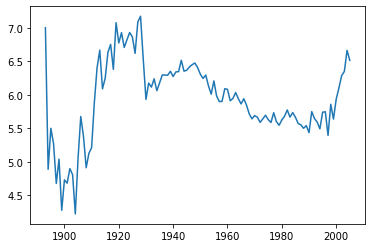

In [258]:
avg_rating_yr = movies_df.groupby('year', as_index=False)['rating'].mean()

plt.plot(avg_rating_yr['year'], avg_rating_yr['rating'])

### Task 2.11: Explore and Interpret

Are old movies better? How could you explain this? 

Are there differences between the rating of major movies and all movies over time? 

Continue to explore and use plots to inform your answer. Interesting measures to consider are the total number of votes per year, the average number of votes for a movie in a particular year, etc. 

We can look at the correlation of time and the average rating. Here the correlation is slightly positive with a value of 0.0396. This indicates that movies might be getting better over time, but the evidence isn't very strong considering how low the correlation is.

We can also look at the correlation coefficient plotted as a line over time. Again, there doesn't visually seem to be an indication that movies have gotten better over time


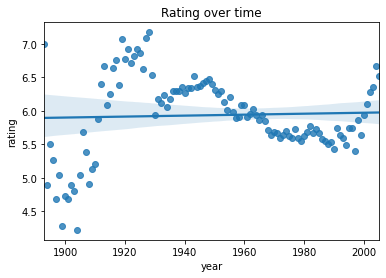

Lastly, we can look at the mean. Old movies (1960 and older) have a mean rating of 6.24. More recent movies have a mean rating of 5.82. Using this logic you could argue old movies are better. Another way to say they are better is by looking at the max rating - it was in the 'old movies' group. However, you can see new movies are starting to increase their ratings. so they are catching up
You can use a plot to help explore this concept, see the plot below:


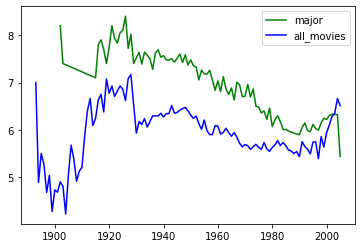

In [284]:
# Are old movies better?

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

corr = np.corrcoef(avg_rating_yr['year'], avg_rating_yr['rating'])[0][1]
print('We can look at the correlation of time and the average rating. Here the correlation is slightly \
positive with a value of {:.4f}. This indicates that movies might be getting better over time, but \
the evidence isn\'t very strong considering how low the correlation is.'.format(corr))

print('\nWe can also look at the correlation coefficient plotted as a line over time. Again, there doesn\'t visually seem \
to be an indication that movies have gotten better over time')
sns.regplot(x=avg_rating_yr['year'], y=avg_rating_yr['rating'])
plt.title('Rating over time')
plt.show()

old_movies = movies_df[movies_df['year'] < 1960]
morerecent_movies = movies_df[movies_df['year'] >= 1960]
print('Lastly, we can look at the mean. Old movies (1960 and older) have a mean rating of {:.2f}. More recent \
movies have a mean rating of {:.2f}. Using this logic you could argue old movies are better. Another way to say they \
are better is by looking at the max rating - it was in the \'old movies\' group. However, you can see new movies are \
starting to increase their ratings. so they are catching up'.format(old_movies['rating'].mean(), morerecent_movies['rating'].mean()))

# Are there differences between the rating of major movies and all movies over time?

print('You can use a plot to help explore this concept, see the plot below:')

major_movies_rating_over_time = movies_df400.groupby('year', as_index=False)['rating'].mean()

plt.plot(major_movies_rating_over_time['year'], major_movies_rating_over_time['rating'], color='green')
plt.plot(avg_rating_yr['year'], avg_rating_yr['rating'], color='blue')
plt.legend(['major','all_movies'])
plt.show()

print('\nThe two plots look correlated, however, all movies seem to be trending better than the major movies since about the year 2000')

**Your interpretation**: TODO